In [11]:
import numpy as np
import matplotlib.pyplot as plt
from osgeo import gdal

# ------------------------------
# 1. Load and Process the DEM
# ------------------------------
dem_file = 'ShackletonDEM_5m.tif'
dem_img = gdal.Open(dem_file)
A = dem_img.GetRasterBand(1).ReadAsArray()

# Define grid spacing (e.g., 5 meters per pixel)
spacing = 5.0
(n_y, n_x) = A.shape

# Generate grid coordinates.
x_vec = np.arange(n_x) * spacing
y_vec = np.arange(n_y) * spacing
x_mat, y_mat = np.meshgrid(x_vec, y_vec)

# Adjust z values (elevation) and replace invalid values with NaN.
z_mat = A / 2.0  
z_mat = np.where(z_mat == 32767 / 2, np.nan, z_mat)


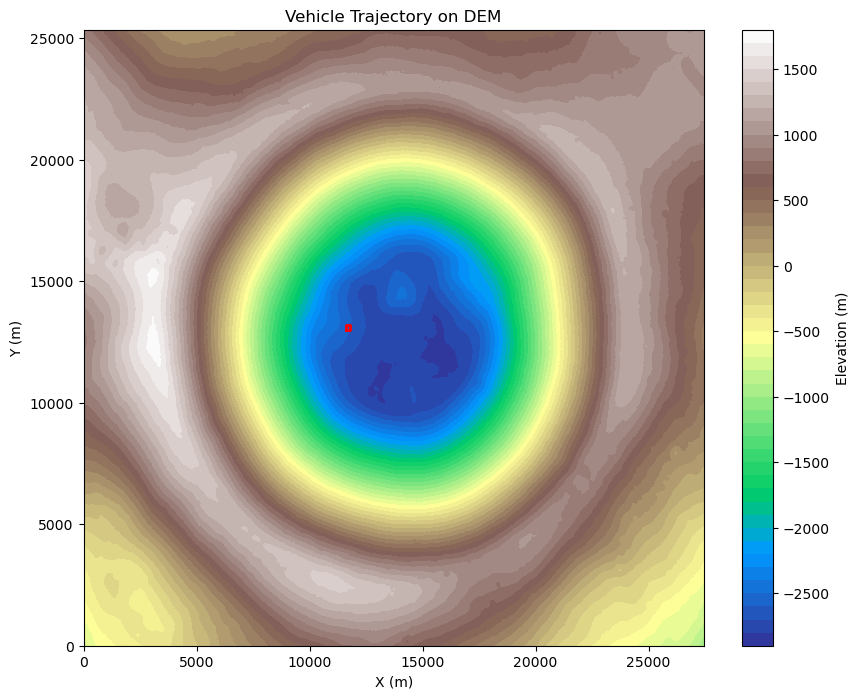

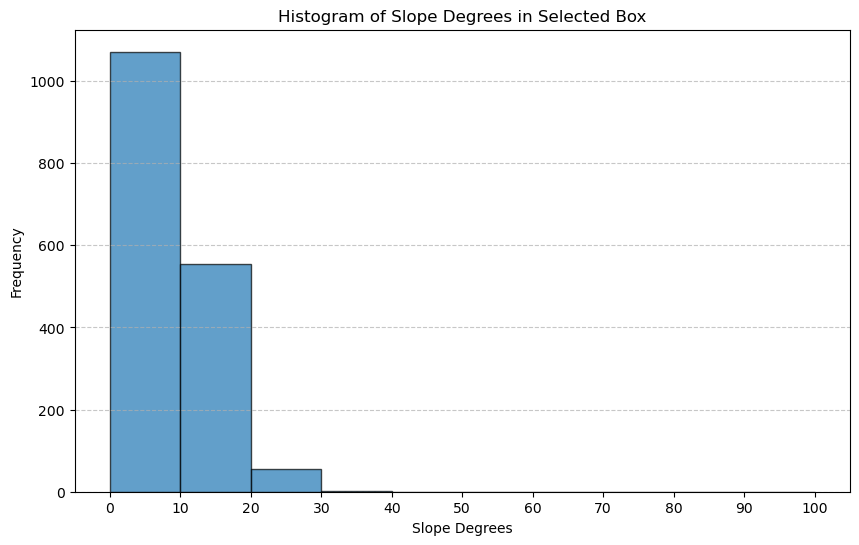

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from osgeo import gdal

# ------------------------------
# 1. Load and Process the DEM
# ------------------------------
dem_file = 'ShackletonDEM_5m.tif'
dem_img = gdal.Open(dem_file)
A = dem_img.GetRasterBand(1).ReadAsArray()

# Define grid spacing (e.g., 5 meters per pixel)
spacing = 5.0
(n_y, n_x) = A.shape

# Generate grid coordinates.
x_vec = np.arange(n_x) * spacing
y_vec = np.arange(n_y) * spacing
x_mat, y_mat = np.meshgrid(x_vec, y_vec)

# Adjust z values (elevation) and replace invalid values with NaN.
z_mat = A / 2.0  
z_mat = np.where(z_mat == 32767 / 2, np.nan, z_mat)

# Compute the gradient of z (elevation) with respect to x and y
dz_dx, dz_dy = np.gradient(z_mat, spacing, spacing)

# Compute the slope in radians
slope_radians = np.arctan(np.sqrt(dz_dx**2 + dz_dy**2))

# Convert the slope to degrees
slope_degrees = np.degrees(slope_radians)

# ------------------------------
# Plot the Environment
# ------------------------------
plt.figure(figsize=(10, 8))
plt.contourf(x_mat, y_mat, z_mat, cmap='terrain', levels=50)

# Define coordinates for the red box (user-defined corners)
x_min, x_max = 11600, 11800  # Example values, modify as needed
y_min, y_max = 13000, 13200  # Example values, modify as needed

# Draw the red box
plt.plot([x_min, x_max, x_max, x_min, x_min], 
         [y_min, y_min, y_max, y_max, y_min], 'r-', linewidth=2)

plt.xlabel('X (m)')
plt.ylabel('Y (m)')
plt.title('Vehicle Trajectory on DEM')
plt.colorbar(label='Elevation (m)')
plt.show()

# ------------------------------
# Filter and Plot Slope Distribution in the Box
# ------------------------------
# Flatten arrays
x_flat = x_mat.ravel()
y_flat = y_mat.ravel()
slope_flat = slope_degrees.ravel()

# Select indices within the defined box
indices = (x_flat >= x_min) & (x_flat <= x_max) & (y_flat >= y_min) & (y_flat <= y_max)
slope_box_filtered = slope_flat[indices]

# Plot histogram
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]  # Bin edges

plt.figure(figsize=(10, 6))
plt.hist(slope_box_filtered, bins=bins, edgecolor='black', alpha=0.7)

plt.xlabel("Slope Degrees")
plt.ylabel("Frequency")
plt.title("Histogram of Slope Degrees in Selected Box")
plt.xticks(bins)  # Ensure ticks align with bin edges
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()


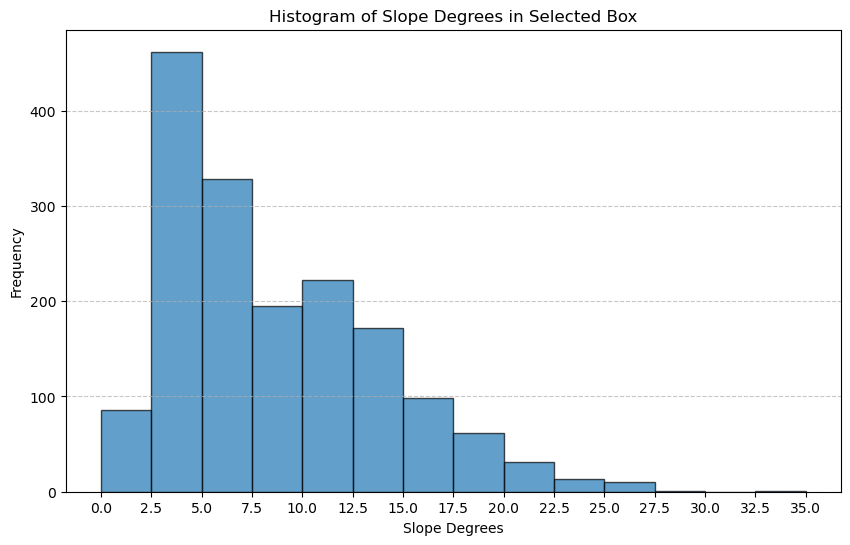

In [13]:
# Plot histogram
bins = [0, 2.5, 5, 7.5, 10, 12.5, 15, 17.5, 20, 22.5, 25, 27.5, 30, 32.5, 35]  # Bin edges

plt.figure(figsize=(10, 6))
plt.hist(slope_box_filtered, bins=bins, edgecolor='black', alpha=0.7)

plt.xlabel("Slope Degrees")
plt.ylabel("Frequency")
plt.title("Histogram of Slope Degrees in Selected Box")
plt.xticks(bins)  # Ensure ticks align with bin edges
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()


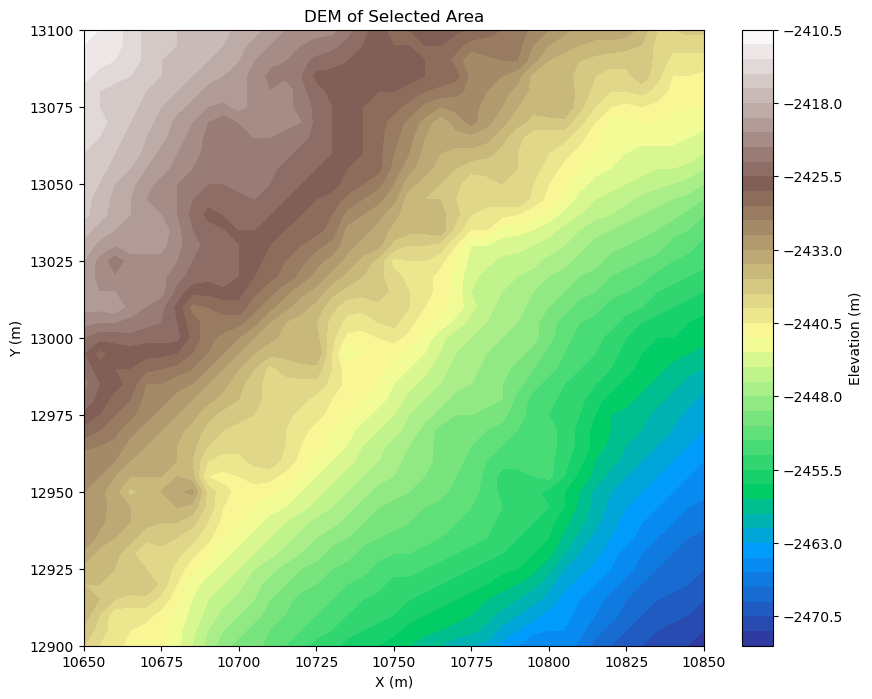

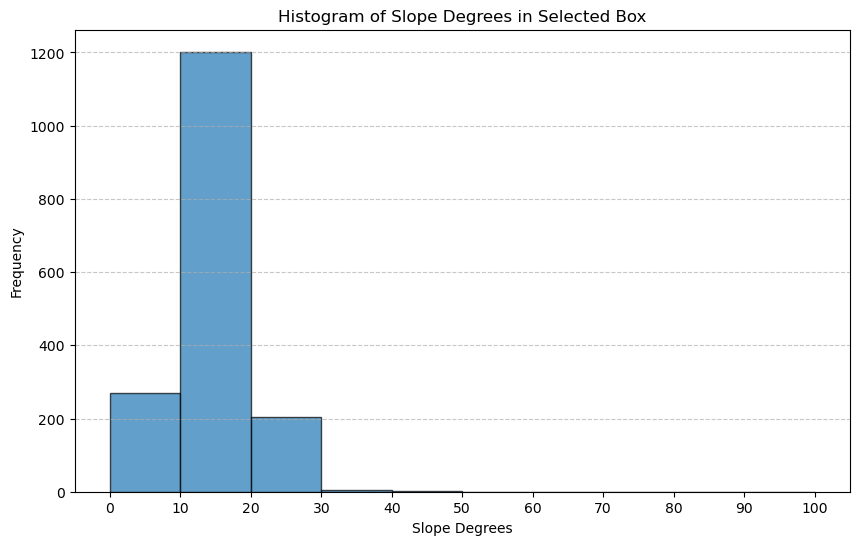

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from osgeo import gdal

# ------------------------------
# 1. Load and Process the DEM
# ------------------------------
dem_file = 'ShackletonDEM_5m.tif'
dem_img = gdal.Open(dem_file)
A = dem_img.GetRasterBand(1).ReadAsArray()

# Define grid spacing (e.g., 5 meters per pixel)
spacing = 5.0
(n_y, n_x) = A.shape

# Generate grid coordinates.
x_vec = np.arange(n_x) * spacing
y_vec = np.arange(n_y) * spacing
x_mat, y_mat = np.meshgrid(x_vec, y_vec)

# Adjust z values (elevation) and replace invalid values with NaN.
z_mat = A / 2.0  
z_mat = np.where(z_mat == 32767 / 2, np.nan, z_mat)

# Compute the gradient of z (elevation) with respect to x and y
dz_dx, dz_dy = np.gradient(z_mat, spacing, spacing)

# Compute the slope in radians
slope_radians = np.arctan(np.sqrt(dz_dx**2 + dz_dy**2))

# Convert the slope to degrees
slope_degrees = np.degrees(slope_radians)

# ------------------------------
# Define coordinates for the red box (user-defined corners)
x_min, x_max = 10650, 10850  # Example values, modify as needed
y_min, y_max = 12900, 13100  # Example values, modify as needed

# Select the indices within the defined box
x_indices = (x_vec >= x_min) & (x_vec <= x_max)
y_indices = (y_vec >= y_min) & (y_vec <= y_max)

x_box = x_mat[np.ix_(y_indices, x_indices)]
y_box = y_mat[np.ix_(y_indices, x_indices)]
z_box = z_mat[np.ix_(y_indices, x_indices)]

# ------------------------------
# Plot only the specific area inside the red box
# ------------------------------
plt.figure(figsize=(10, 8))
plt.contourf(x_box, y_box, z_box, cmap='terrain', levels=50)

plt.xlabel('X (m)')
plt.ylabel('Y (m)')
plt.title('DEM of Selected Area')
plt.colorbar(label='Elevation (m)')
plt.show()

# ------------------------------
# Filter and Plot Slope Distribution in the Box
# ------------------------------
slope_box = slope_degrees[np.ix_(y_indices, x_indices)].ravel()

# Plot histogram
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]  # Bin edges

plt.figure(figsize=(10, 6))
plt.hist(slope_box, bins=bins, edgecolor='black', alpha=0.7)

plt.xlabel("Slope Degrees")
plt.ylabel("Frequency")
plt.title("Histogram of Slope Degrees in Selected Box")
plt.xticks(bins)  # Ensure ticks align with bin edges
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()


In [15]:
#np.savez_compressed("dem_box_data.npz", x_box=x_box, y_box=y_box, z_box=z_box)


In [16]:
# Define grid spacing
spacing = 5.0

# Compute the gradient of z (elevation) with respect to x and y
dz_dx, dz_dy = np.gradient(z_box, spacing, spacing)

# Compute the slope in radians
slope_radians = np.arctan(np.sqrt(dz_dx**2 + dz_dy**2))

# Convert the slope to degrees
slope_degrees = np.degrees(slope_radians)

# Load sigmoid parameters
sigmoid_params = np.load('sigmoid_params.npy')
L, x0, k, c = sigmoid_params

# Define the modified sigmoid function
def modified_sigmoid(x, L, x0, k, c):
    """
    Modified sigmoid function used for mapping slope to slip.
    """
    return L / (1 + np.exp(-k * (x - x0))) + c

# Compute the slip coefficient for each location
slip_coefficients = modified_sigmoid(slope_degrees, L, x0, k, c)

# Save the updated data with slope and slip coefficient
#np.savez_compressed("dem_box_with_slope_slip.npz", x_box=x_box, y_box=y_box, z_box=z_box, slope_degrees=slope_degrees, slip_coefficients=slip_coefficients)

#print(slip_coefficients.shape)


In [17]:
inv_poly_params = np.load('inv_poly_coeffs.npy')
sigmoid_params  = np.load('sigmoid_params.npy')

# -------------------------------------------
# 2. Define the modified sigmoid function
# -------------------------------------------
def modified_sigmoid(x, L, x0, k, c):
    """
    Modified sigmoid function used for mapping slope to slip.
    """
    return L / (1 + np.exp(-k * (x - x0))) + c

# -------------------------------------------
# 3. Define the function to convert slope to friction
# -------------------------------------------
def slope_to_friction(slope, sigmoid_params, inv_poly_params):
    """
    Converts a given slope (degrees) to a friction coefficient by:
      1. Computing the slip from the slope using a modified sigmoid.
      2. Converting the slip to friction using the inverse polynomial fit.
    
    Parameters:
      slope (float): The slope value in degrees.
      sigmoid_params (iterable): Parameters [L, x0, k, c] for the sigmoid.
      inv_poly_params (array-like): Polynomial coefficients mapping slip to friction.
    
    Returns:
      friction (float): The computed friction coefficient.
    """
    # Compute slip from slope using the modified sigmoid
    L, x0, k, c = sigmoid_params
    slip = modified_sigmoid(slope, L, x0, k, c)
    
    # Convert slip from percentage to fraction (if needed)
    slip = slip / 100.0
    
    # Compute friction from slip using the inverse polynomial
    friction = np.polyval(inv_poly_params, slip)
    return friction

In [18]:
friction_values = slope_to_friction(slope_degrees, sigmoid_params, inv_poly_params)

#np.savez_compressed("dem_box_full.npz", x_box=x_box, y_box=y_box, z_box=z_box, slope_degrees=slope_degrees, slip_coefficients=slip_coefficients, friction_values=friction_values)


In [19]:
slip_grid = slip_coefficients  # 2D array of slip values

# If available, use x_box and y_box for the grid coordinates.
# Otherwise, create coordinate arrays based on the grid shape.

GRID_HEIGHT, GRID_WIDTH = slip_grid.shape
x_box = np.arange(GRID_WIDTH)
y_box = np.arange(GRID_HEIGHT)

# Create a meshgrid for contour plotting.
X, Y = np.meshgrid(x_box, y_box)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


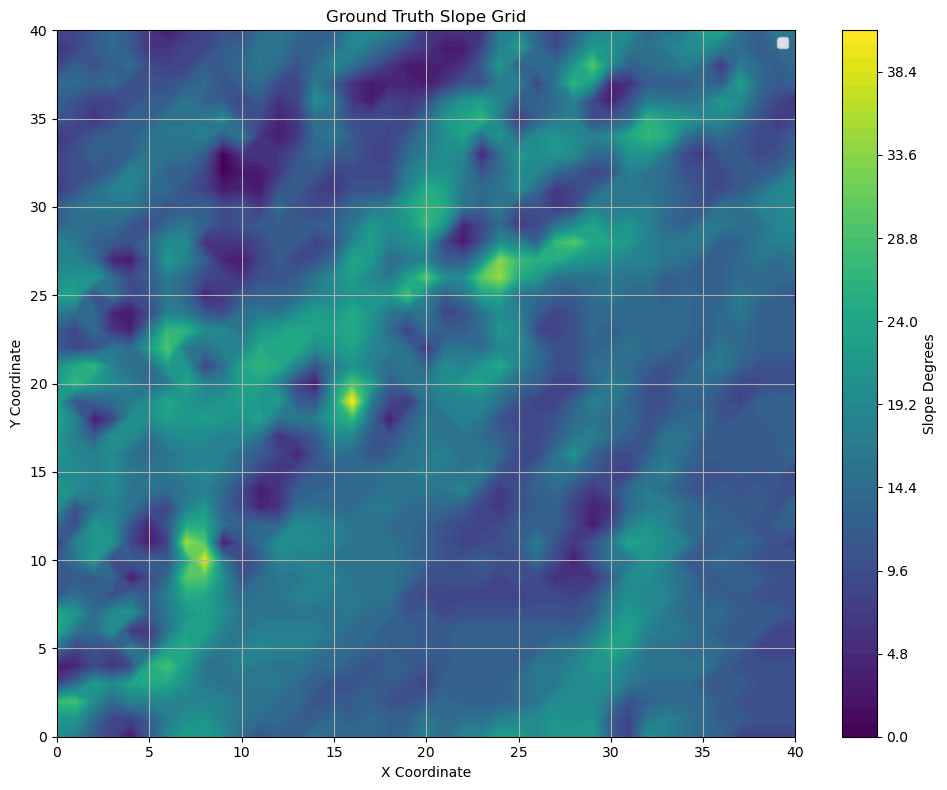

In [20]:
plt.figure(figsize=(10, 8))
# Plot ground-truth slip values as filled contours
contour = plt.contourf(X, Y, slope_degrees, cmap='viridis', levels=50)
plt.colorbar(contour, label='Slope Degrees')


plt.title("Ground Truth Slope Grid")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.legend()
plt.grid(True)
plt.tight_layout()

# Optionally, save the figure to a file
plt.show()


In [21]:
print(slope_degrees.shape)
print(np.mean(slope_degrees))


# Option 1: Add fixed noise (absolute value of 0.03)
ten_percent_noise = 0.1 * np.mean(slope_degrees)
three_percent_noise = 0.03 * np.mean(slope_degrees)
one_percent_noise = 0.01 * np.mean(slope_degrees)

noisy_slope_degrees_ten = slope_degrees + ten_percent_noise
noisy_slope_degrees_three = slope_degrees + three_percent_noise
noisy_slope_degrees_one = slope_degrees + one_percent_noise

(41, 41)
14.255080787878546


In [22]:
np.savez_compressed("dem_box_full.npz", x_box=x_box, y_box=y_box, z_box=z_box, slope_degrees=slope_degrees, 
                    slip_coefficients=slip_coefficients, friction_values=friction_values, noisy_slope_degrees_ten=noisy_slope_degrees_ten,
                      noisy_slope_degrees_three=noisy_slope_degrees_three, noisy_slope_degrees_one=noisy_slope_degrees_one)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


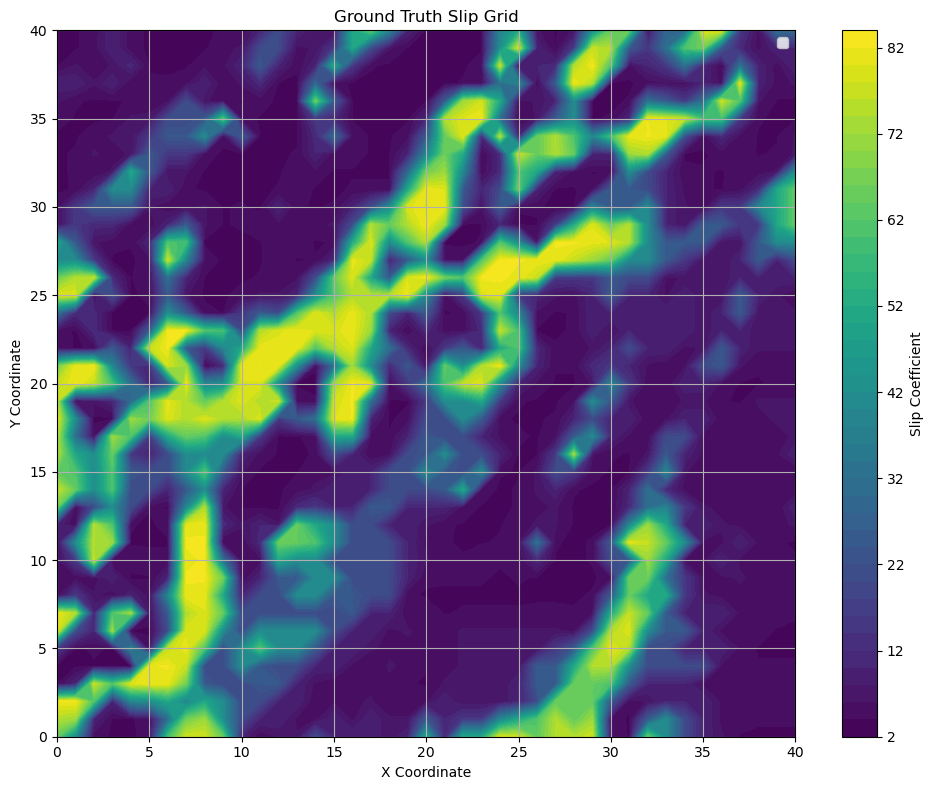

In [23]:
plt.figure(figsize=(10, 8))
# Plot ground-truth slip values as filled contours
contour = plt.contourf(X, Y, slip_grid, cmap='viridis', levels=50)
plt.colorbar(contour, label='Slip Coefficient')


plt.title("Ground Truth Slip Grid")
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.legend()
plt.grid(True)
plt.tight_layout()

# Optionally, save the figure to a file
#plt.savefig("trajectory_on_slip_grid.png", dpi=300)
plt.show()